In [3]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image

In [10]:
%matplotlib inline

In [11]:
dataset_path = 'CroppedYale/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

In [12]:
training_pics_address = np.load('./training_pics.npy', allow_pickle=True)
testing_pics_address = np.load('./testing_pics.npy', allow_pickle=True)

def load_images():
    im_size=(64,64)
    training_im = []
    testing_im = []
    training_label = []
    testing_label = []
    
    for i in training_pics_address:
        im_a = np.array(Image.open(i),'uint8')
        im_a = cv2.resize(im_a, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
        training_im.append(im_a)
        gg = i.split('/')
        gg = gg[1]
        training_label.append(gg)
        
    for i in testing_pics_address:
        im_a = np.array(Image.open(i),'uint8')
        im_a = cv2.resize(im_a, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
        testing_im.append(im_a)
        gg = i.split('/')
        gg = gg[1]
        testing_label.append(gg)
    
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
training_im, training_label, testing_im, testing_label = load_images()

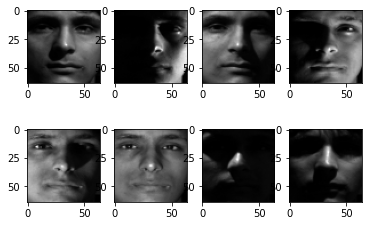

In [13]:
training_tensor = np.ndarray(shape=(len(training_pics_address), 64*64), dtype=np.float64)

for i in range(len(training_im)):
    training_tensor[i,:] = np.array(training_im[i], dtype='float64').flatten()
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

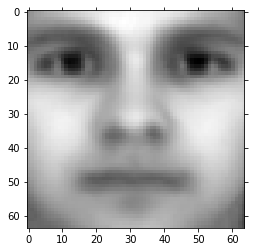

In [14]:
mean_face = np.zeros((1,64*64))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_pics_address))).flatten()

plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [15]:
height = 64
width = 64

normalised_training_tensor = np.ndarray(shape=(len(training_pics_address), height*width))

for i in range(len(training_pics_address)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

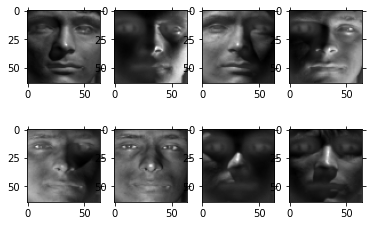

In [16]:
plt.clf()
for i in range(len(training_pics_address)):
    img = normalised_training_tensor[i].reshape(height,width)
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# EIGENVECTORS AND VALUES USING SVD

In [17]:
len(training_pics_address)
!ls CroppedYale

yaleB01  yaleB06  yaleB11  yaleB17  yaleB22  yaleB27  yaleB32  yaleB37
yaleB02  yaleB07  yaleB12  yaleB18  yaleB23  yaleB28  yaleB33  yaleB38
yaleB03  yaleB08  yaleB13  yaleB19  yaleB24  yaleB29  yaleB34  yaleB39
yaleB04  yaleB09  yaleB15  yaleB20  yaleB25  yaleB30  yaleB35
yaleB05  yaleB10  yaleB16  yaleB21  yaleB26  yaleB31  yaleB36


In [18]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,len(training_pics_address))
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(2248, 2248)
Covariance matrix of X: 
[[ 0.45919333  0.10864186 -0.10361375 ... -0.07049635  0.09787939
   0.20766079]
 [ 0.10864186  0.88117227 -0.5270118  ... -0.03729054  0.34420185
  -0.24431859]
 [-0.10361375 -0.5270118   0.68483591 ... -0.09728914 -0.26197937
   0.11906753]
 ...
 [-0.07049635 -0.03729054 -0.09728914 ...  0.26542322 -0.08426515
   0.02402937]
 [ 0.09787939  0.34420185 -0.26197937 ... -0.08426515  0.54632651
  -0.10252698]
 [ 0.20766079 -0.24431859  0.11906753 ...  0.02402937 -0.10252698
   0.45831511]]


In [19]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-1.14400999e-02 -1.65891979e-02 -1.94724979e-02 ...  7.66255971e-03
   4.70722124e-03 -6.68415733e-03]
 [-1.79827414e-02  2.74514115e-02  4.48673624e-03 ... -6.24196875e-03
   1.28522593e-02  2.32495761e-02]
 [ 1.85356190e-02 -9.87078595e-03 -2.29502056e-02 ...  7.35871485e-03
  -1.61525702e-02 -1.29605783e-02]
 ...
 [ 1.21162058e-05 -4.77458971e-03  3.18931973e-02 ... -2.82435329e-02
  -5.05349332e-02  2.99779434e-02]
 [-1.11081765e-02  1.86126073e-02 -1.38875201e-02 ... -9.54544256e-03
   5.72546410e-03  1.72541506e-02]
 [-9.77766291e-04 -3.09992742e-02 -1.30896305e-02 ... -4.03732719e-02
   4.83010234e-04 -3.85511524e-02]]

Eigenvalues of Cov(X): 
[1.27278380e+03 2.97640391e+02 1.47114146e+02 ... 1.70161170e-04
 1.70863453e-04 1.69742531e-04]


In [20]:
eigenvectors.shape

(2248, 2248)

In [21]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.51133575 0.63091158 0.69001409 ... 1.         1.         1.        ]


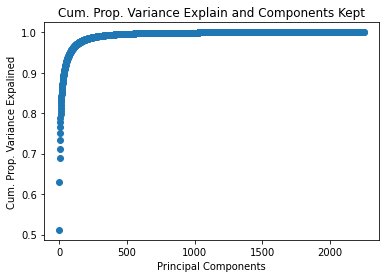

In [22]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [23]:
reduced_data = np.array(eigvectors_sort[:8]).transpose()

In [24]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

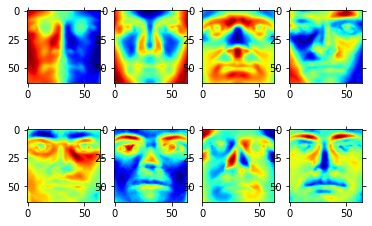

In [25]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [26]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

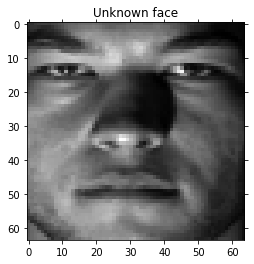

In [27]:
unknown_face        = testing_im[-1]
# unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

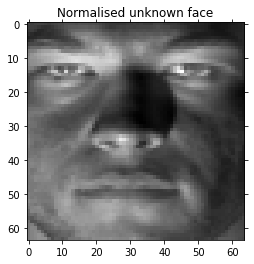

In [28]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [29]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ 9.49077187e+07, -2.85524562e+08,  1.31433779e+08, -9.60677902e+06,
        2.71277415e+07, -1.49218802e+08, -2.96219362e+07,  7.67504883e+07])

In [30]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

[4.89657876e+08 7.24895643e+08 4.69844219e+08 ... 3.71625902e+08
 7.36590836e+08 2.53641066e+08]


33095524.300798953

yaleB35
yaleB22
yaleB35
yaleB23
yaleB35
yaleB35
yaleB35
yaleB20
yaleB35
yaleB38
yaleB35
yaleB08
yaleB16
yaleB03
yaleB16
yaleB30
yaleB16
yaleB07
yaleB16
yaleB03
yaleB16
yaleB13
yaleB16
yaleB37
yaleB02
yaleB06
yaleB02
yaleB06
yaleB02
yaleB18
yaleB02
yaleB05
yaleB02
yaleB34
yaleB10
yaleB16
yaleB10
yaleB29
yaleB10
yaleB13
yaleB10
yaleB03
yaleB10
yaleB16
yaleB10
yaleB13
yaleB06
yaleB11
yaleB06
yaleB29
yaleB06
yaleB09
yaleB06
yaleB33
yaleB06
yaleB26
yaleB06
yaleB20
yaleB34
yaleB03
yaleB34
yaleB06
yaleB34
yaleB07
yaleB34
yaleB25
yaleB34
yaleB38
yaleB34
yaleB33
yaleB17
yaleB07
yaleB17
yaleB21
yaleB17
yaleB28
yaleB17
yaleB26
yaleB17
yaleB36
yaleB17
yaleB21
yaleB05
yaleB02
yaleB05
yaleB18
yaleB05
yaleB34
yaleB05
yaleB37
yaleB05
yaleB33
yaleB05
yaleB13
yaleB13
yaleB37
yaleB13
yaleB10
yaleB13
yaleB13
yaleB13
yaleB07
yaleB13
yaleB04
yaleB13
yaleB02
yaleB36
yaleB06
yaleB36
yaleB04
yaleB36
yaleB10
yaleB36
yaleB15
yaleB36
yaleB17
yaleB23
yaleB28
yaleB23
yaleB27
yaleB23
yaleB35
yaleB23
yaleB26
yaleB23


yaleB21
yaleB27
yaleB21
yaleB03
yaleB21
yaleB23
yaleB21
yaleB31
yaleB21
yaleB25
yaleB03
yaleB16
yaleB03
yaleB01
yaleB03
yaleB26
yaleB03
yaleB25
yaleB03
yaleB16
yaleB03
yaleB04
yaleB20
yaleB38
yaleB20
yaleB12
yaleB20
yaleB21
yaleB20
yaleB08
yaleB20
yaleB25
yaleB20
yaleB30
yaleB07
yaleB31
yaleB07
yaleB16
yaleB07
yaleB09
yaleB07
yaleB33
yaleB07
yaleB31
yaleB07
yaleB01
yaleB38
yaleB12
yaleB38
yaleB08
yaleB38
yaleB08
yaleB38
yaleB32
yaleB38
yaleB25
yaleB38
yaleB12
Correct predictions: 5/222 = 2.2522522522522523%


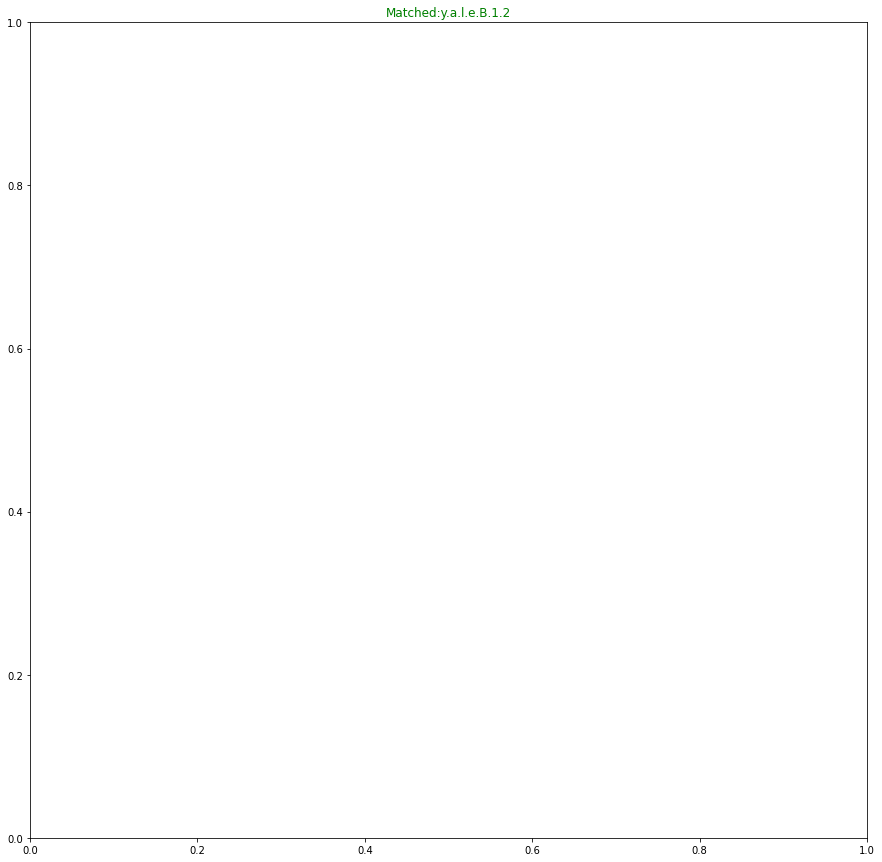

In [40]:
count = 0
num_images = 0
correct_pred = 0
def recogniser(curr_testing_im, curr_testing_label, proj_data, w):
    global count, num_images, correct_pred
    unknown_face = curr_testing_im
    num_images += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    t0 = 88831687
    
    if norms[index] < t1 or True:
#         print

        if norms[index] < t0 or True: # It's a face
            print("=====================")
            print(curr_testing_label)
            print(training_label[index])
            print("=====================")
            if curr_testing_label == training_label[index]:
                plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
#         else:
#             if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
#                 plt.title('Unknown face!', color='g')
#                 correct_pred += 1
#             else:
#                 plt.title('Unknown face!', color='r')
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
#         plt.subplots_adjust(right=1.2, top=2.5)
    
#     else:     
# #         plt.subplot(9,4,1+count)
# #         if len(img.split('.')) == 3:
#             pass
# #             plt.title('Not a face!', color='r')
#         else:
# #             plt.title('Not a face!', color='g')
#             correct_pred += 1
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    
    count+=1

fig = plt.figure(figsize=(15, 15))
for idx, curr_testing_im in enumerate(testing_im):
    recogniser(curr_testing_im, testing_label[idx], proj_data, w)

# plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

In [5]:
!ls

CroppedYale	    eig.cpp	      FEIDataset	README.md     zwchan
CroppedYaleTesting  EigenFaces.ipynb  FINAL.ipynb	vutsal_singh
Documents	    ExtendedYale.zip  fishcer_faces.py	YaleDataset


In [6]:
import random
  
# declaring list
list = [2, 2, 4, 6, 6, 8]
  
# initializing the value of n
n = 4
  
# printing n elements from list
print(random.sample(list, n))

[2, 6, 8, 4]


In [7]:
dirs = os.listdir('CroppedYale/')

testing_pics = []
training_pics = []

for i in dirs:
    print(i)
    
    pics = os.listdir('CroppedYale/'+i)
    testing_mojo = random.sample(range(len(pics)), int(0.1*len(pics)))
    
    for j in testing_mojo:
        testing_pics.append('CroppedYale/'+i+'/'+pics[j])
    
    training_pics = training_pics + [f'CroppedYale/{i}/{pics[ii]}' for ii in range(len(pics)) if ii not in testing_mojo]
        
training_pics = [i for i in training_pics if '.pgm' in i]   
testing_pics = [i for i in testing_pics if '.pgm' in i]   

testing_pics = np.array(testing_pics)
training_pics = np.array(training_pics)

testing_pics.dump('testing_pics.npy')
training_pics.dump('training_pics.npy')

yaleB35
yaleB16
yaleB02
yaleB10
yaleB06
yaleB34
yaleB17
yaleB05
yaleB13
yaleB36
yaleB23
yaleB24
yaleB18
yaleB22
yaleB11
yaleB31
yaleB19
yaleB29
yaleB27
yaleB09
yaleB28
yaleB25
yaleB33
yaleB01
yaleB30
yaleB32
yaleB26
yaleB08
yaleB04
yaleB12
yaleB39
yaleB37
yaleB15
yaleB21
yaleB03
yaleB20
yaleB07
yaleB38


In [8]:
!ls

CroppedYale	    EigenFaces.ipynb  fishcer_faces.py	 vutsal_singh
CroppedYaleTesting  ExtendedYale.zip  README.md		 YaleDataset
Documents	    FEIDataset	      testing_pics.npy	 zwchan
eig.cpp		    FINAL.ipynb       training_pics.npy


In [9]:
print(training_pics)

['CroppedYale/yaleB35/yaleB35_P00A-035E+40.pgm'
 'CroppedYale/yaleB35/yaleB35_P00A-110E-20.pgm'
 'CroppedYale/yaleB35/yaleB35_P00A+035E+40.pgm' ...
 'CroppedYale/yaleB38/yaleB38_P00A+000E-35.pgm'
 'CroppedYale/yaleB38/yaleB38_P00A-110E+40.pgm'
 'CroppedYale/yaleB38/yaleB38_P00A+000E+20.pgm']
